###### Pasos de la Actividad

###### 1. Realizar un análisis exploratorio de los datos para identificar
###### relaciones entre variables, valores atípicos, tendencias, etc.
###### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
###### transformándolos según sea necesario.
###### 3. Seleccionar las características más relevantes para entrenar el
###### modelo utilizando selección de características.
###### 4. Dividir el dataset en Train y Test para evaluar correctamente el
###### modelo.
###### 5. Entrenar el modelo configurando los diferentes
###### hiperparámetros.
###### 6. Evaluar el desempeño del modelo en el conjunto de Test con
###### métricas como precisión, recall, F1-score, etc.
###### 7. Realizar las diferentes gráficas que permitan visualizar los
###### resultados del modelo.
###### 8. Interpretar, analizar y documentar los resultados obtenidos.
###### 9. Crear una cuenta en GitHub y cargar los códigos de los modelos
######  diseñados https://github.com/

### 1. Realizar un análisis exploratorio de los datos para identificar
### relaciones entre variables, valores atípicos, tendencias, etc.

In [7]:
#Cargar las librerias requeridas

import pandas as pd # Manejor y análisis de estructura de datos
import numpy as np # Calculo numérico y el análisis de datos
import seaborn as sns # Creación graficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en 2 dimensiones

#Librerias para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import zscore
import math

import warnings
warnings.filterwarnings("ignore")

# Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# Por ejemplo, ejecutar esto (haciendo clic en ejecutar o presionando Shift+Enter) enumerará todos los archivos en el directorio de entrada

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puedes escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando creas una versión usando "Guardar y ejecutar todo"
# También puedes escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

In [4]:
#Lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('D:/Tareas/7 semestre/Analisis de datos/Nueva carpeta/archive (1)/Titanic-Dataset.csv')

In [5]:
#Realizamos lestura de los datos para el analisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

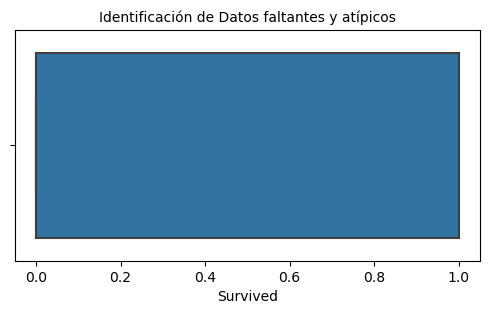

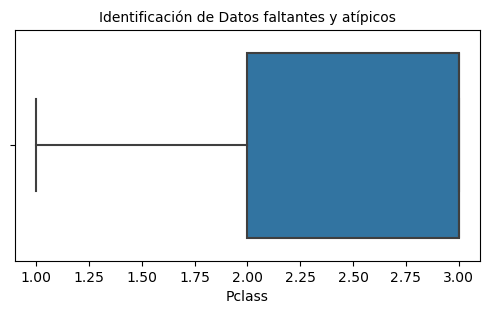

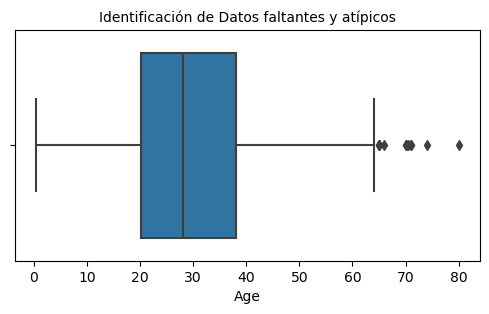

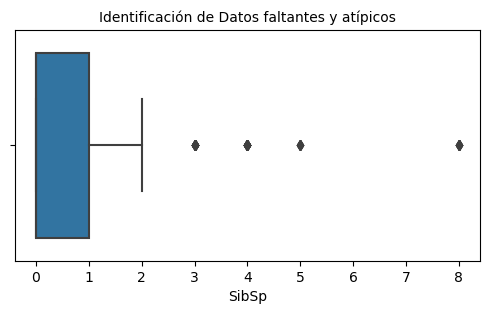

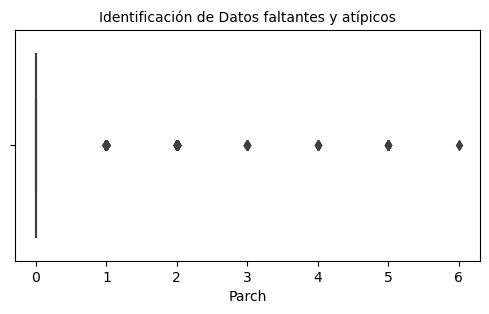

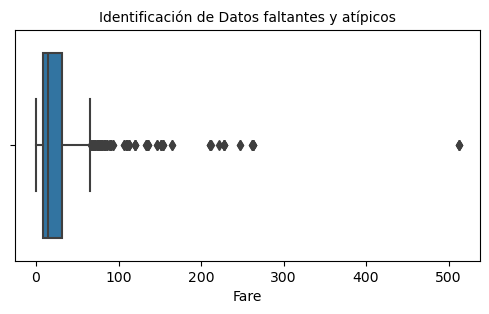

In [33]:
#Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Survived'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos faltantes y atípicos', fontsize=10)

##### No se observan valores atipicos al realizar un analisis exploratorio de los datos.

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y
### transformándolos según sea necesario.

In [35]:
#Observamos si tenemos datos nulos

Datos.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Los datos de passengerID, embarked, Cabin, Name y Ticket, no son relevantes en el estudio a realizar, por ende, los eliminaremos.

In [65]:
data = Datos.drop(columns=['PassengerId', 'Embarked', 'Cabin', 'Name', 'Ticket'])
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


##### Para el caso de Age vamos a reemplazar esos valores nulos usando la imputación por Clase o Grupo.

In [66]:
# Imputar valores nulos en 'Age' con la mediana por 'Pclass' y 'Sex'
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [67]:
#Eliminación de variables categoricas y reemplazo de estas mismas por variables númericas

data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [68]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


### 3. Seleccionar las características más relevantes para entrenar el
### modelo utilizando selección de características.

###### Caracteristica de interes: Survived que es el que contiene los datos de quien sobrevivio o no al accidente del Titanic.

In [69]:
data['Survived'].value_counts()

#Tengamos en cuenta que cuando el valor es 1, nos indica que si sobrevivieron, si el valor eso 0, nos indica que no sobrevivieron.

Survived
0    549
1    342
Name: count, dtype: int64

##### Realizamos graficas comparando el dato de interes con los demas datos.

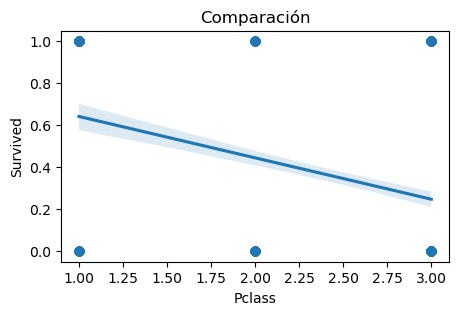

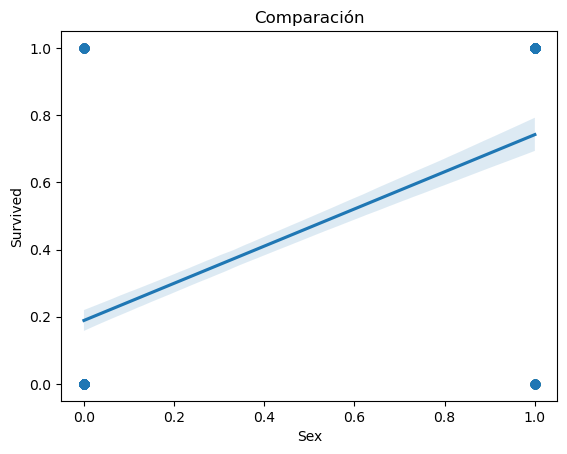

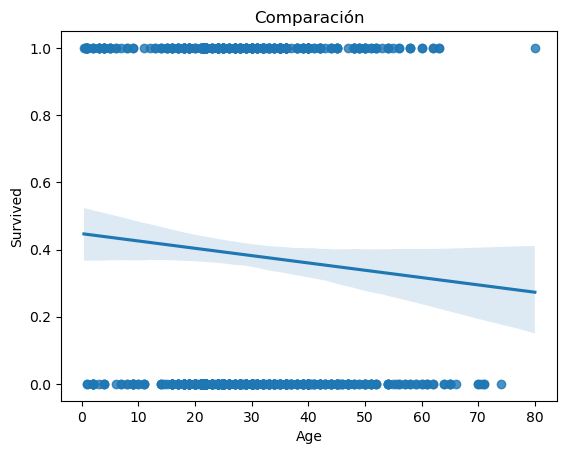

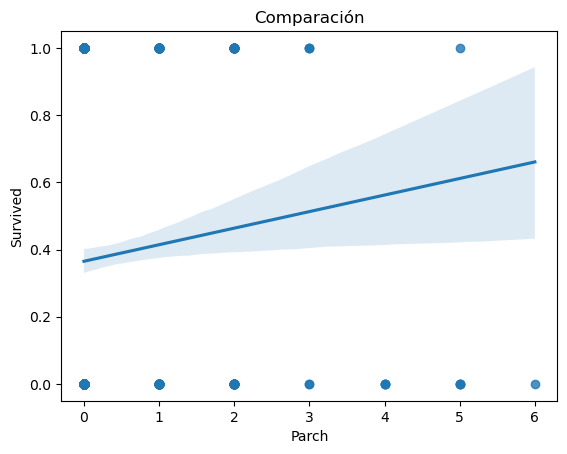

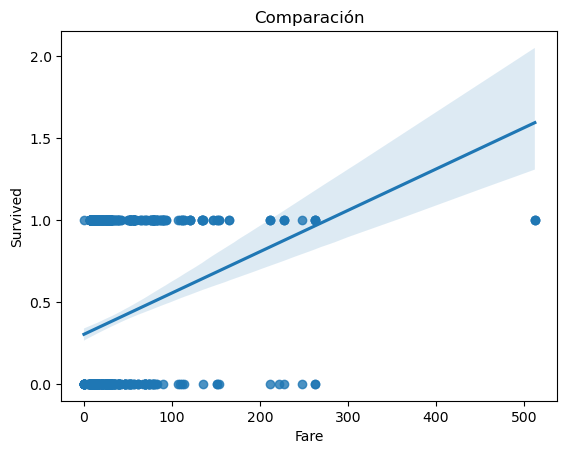

In [70]:
plt.figure(figsize = (5,3))
sns.regplot(x = 'Pclass', y = 'Survived', data = data)
plt.title('Comparación')
plt.show()

sns.regplot(x = 'Sex', y = 'Survived', data = data)
plt.title('Comparación')
plt.show()

sns.regplot(x = 'Age', y = 'Survived', data = data)
plt.title('Comparación')
plt.show()

sns.regplot(x = 'Parch', y = 'Survived', data = data)
plt.title('Comparación')
plt.show()

sns.regplot(x = 'Fare', y = 'Survived', data = data)
plt.title('Comparación')
plt.show()

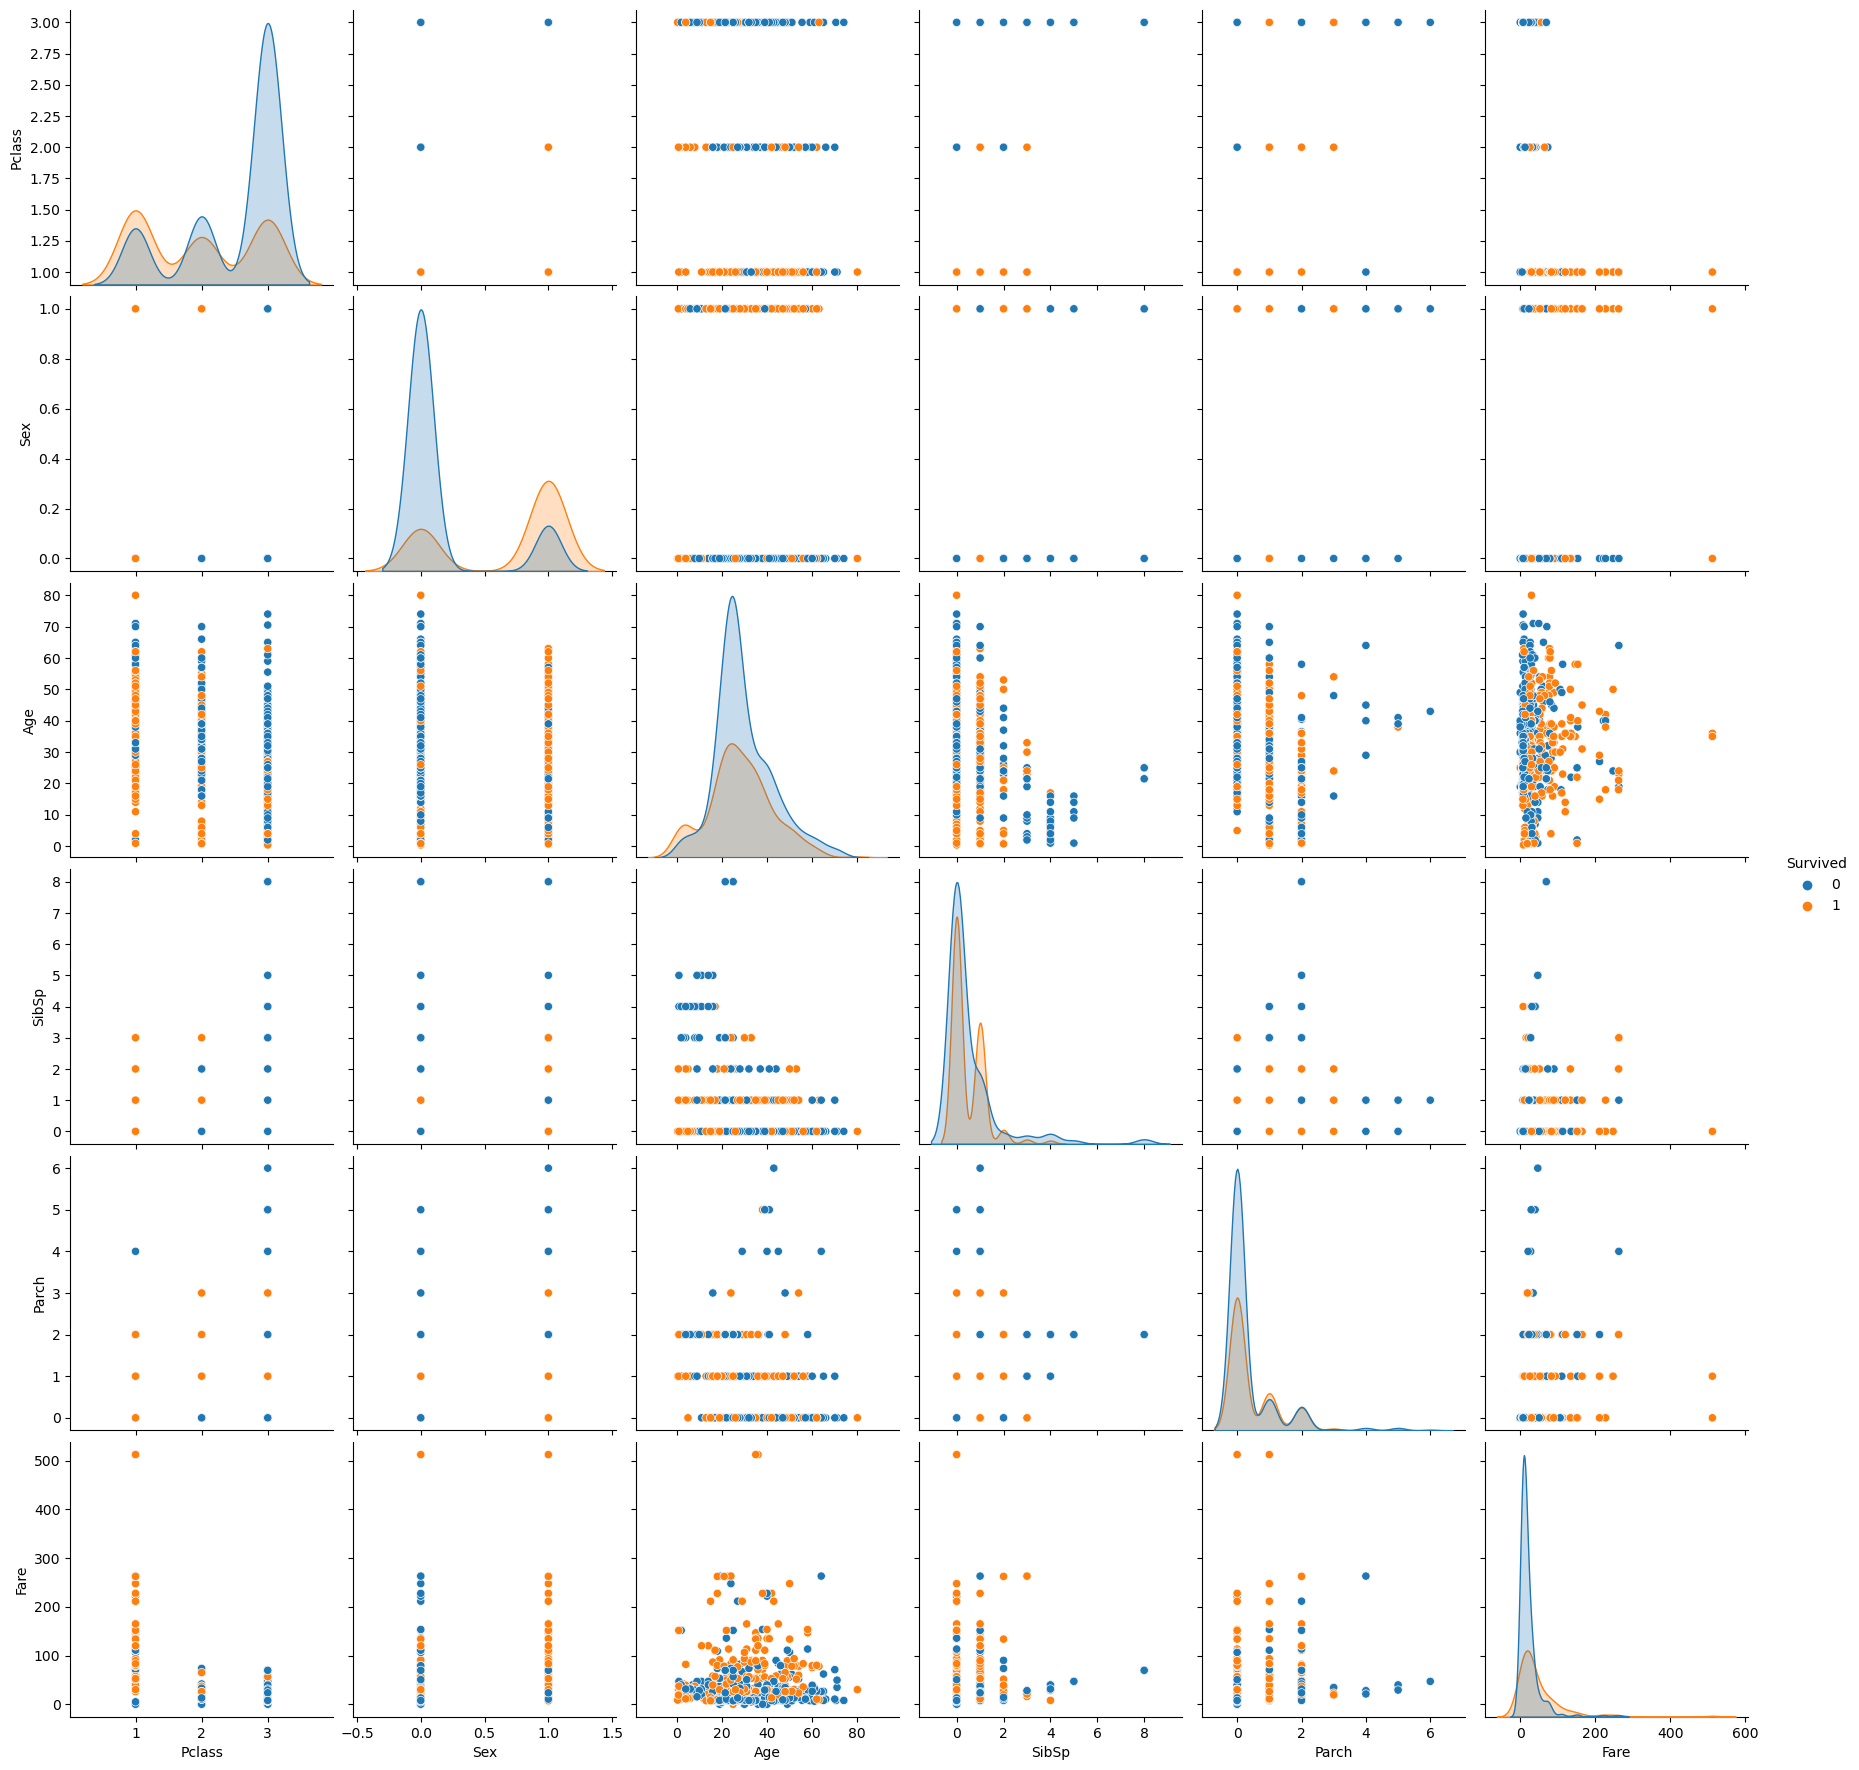

In [63]:
sns.pairplot(data.drop('PassengerId', axis=1), size=3,kind='scatter', hue='Survived')
plt.show()

### 4. Dividir el dataset en Train y Test para evaluar correctamente el
### modelo.

In [71]:
#Eliminamos algunos datos que no queremos en X y seleccionamos el dato que queremos en Y

X=data.drop(columns=['Survived'],axis=1)
y=data['Survived']

In [72]:
from sklearn.model_selection import train_test_split

#Crear variables X y Y para almacenar la información del entrenamiento

#Usamos la función train_test_split que nos permite realizar la división de un conjunto de datos

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False,)

In [73]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch      Fare
0         3    0  22.0      1      0    7.2500
1         1    1  38.0      1      0   71.2833
2         3    1  26.0      0      0    7.9250
3         1    1  35.0      1      0   53.1000
4         3    0  35.0      0      0    8.0500
..      ...  ...   ...    ...    ...       ...
707       1    0  42.0      0      0   26.2875
708       1    1  22.0      0      0  151.5500
709       3    0  25.0      1      1   15.2458
710       1    1  24.0      0      0   49.5042
711       1    0  40.0      0      0   26.5500

[712 rows x 6 columns]


In [74]:
print (Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
707    1
708    1
709    1
710    1
711    0
Name: Survived, Length: 712, dtype: int64


### 5. Entrenar el modelo configurando los diferentes
### hiperparámetros.

In [75]:
#Construir el modelo de regresión lineal

model_logistic_regression=LinearRegression() #liblinear es una libreria para resolver problemas lineales de clasificación y regresión
model_logistic_regression.fit(X_train, Y_train)

#Creamos el modelo de predicción

Prediccion=model_logistic_regression.predict(X_test) #La función predict predice los valores a partir del conjunto de datos

In [76]:
print (Y_test)

712    1
713    0
714    0
715    0
716    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 179, dtype: int64


In [77]:
print(Prediccion)

[ 0.33455802  0.10871255  0.15939642  0.1668217   0.95840471  0.81362865
  0.13271853  0.08519314  0.90954913  0.1414343   0.26436558  0.17105966
  0.45714626  0.16110443  0.68636956  0.66097661  0.28133497  0.60360376
  1.00906114  0.21473248  0.28622389  0.3285134   0.3285134   0.11237562
  0.38520986  0.49934011  0.13185974  0.13185974  0.41570974  0.40756978
  0.92934216  0.10163455  0.09687332  0.17932357  0.1196716   0.79641613
  0.50379922  0.09685355  0.88309965  0.21409307  0.08538795  0.14352298
  0.60216709  0.39283492  0.11435359  0.35750209  0.07939258  0.97163603
  0.13260559  0.03846677  0.16094256  0.86277198  0.18433067  0.82871886
  0.41679393  0.60849344  0.09671207  0.09109111  0.13787253 -0.00227221
  0.63868006  0.13178398  0.53334947  0.17266461  0.13184327  0.75773337
  0.13184186  0.89833387  0.71048797  1.02462699  0.47985756  0.03846382
  0.13176422  0.13178681  0.68135998  0.0563768   0.178098    0.38627647
  0.13184327  0.3708029   0.31392143  0.41578832  0

### 6. Evaluar el desempeño del modelo en el conjunto de Test con
### métricas como precisión, recall, F1-score, etc.

In [82]:
#Desempeño del modelo de regresión

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(Y_test, Prediccion))
r2 = r2_score(Y_test, Prediccion)

print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 0.35721670760158863
R^2 Score: 0.444490136834948


### 7. Realizar las diferentes gráficas que permitan visualizar los
### resultados del modelo.

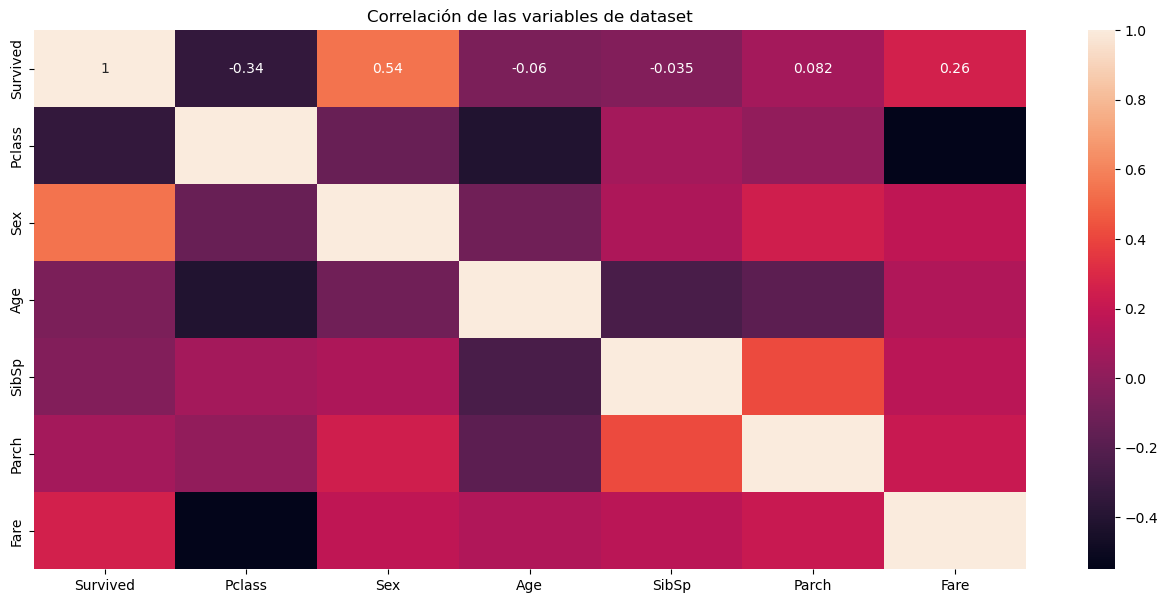

In [85]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlación de las variables de dataset')
plt.show()

Text(0, 0.5, 'Prediccion')

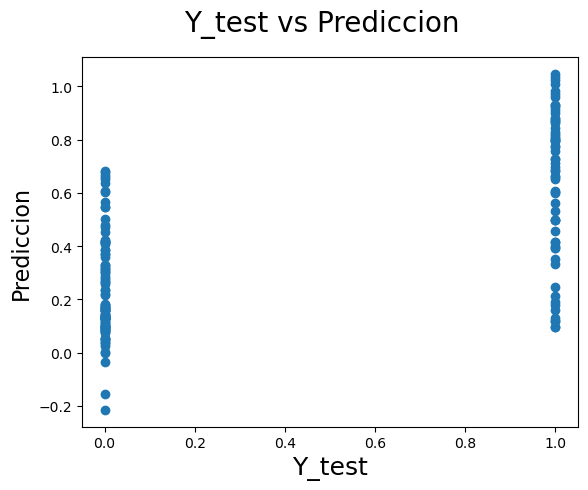

In [86]:
# Trazar y_test e y_pred para comprender la propagación.

fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)              # Título de la trama
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16)                          # Y-label

### 8. Interpretar, analizar y documentar los resultados obtenidos.

##### Modelo de regresión lineal:##### 
-	R-2: En r2 obtuvimos un valor aproximado a 0441 que significa que alrededor del445% de la variabilidad de la variable Y a su promedio es explicado por el modelo de regresión ajustado.##### 
-	Error Cuadrático Medio (MSE)Un MSE algo bajo 0.35721670760158863 esto nos indica que el modelo no cuenta con un error en sus predicciones, nos indica que las predicciones no estan tan alejadas a los valores reales..
